
## Описание данных
https://github.com/AI-YP-24-2-1/.github/blob/main/dataset.md
* date - Date 2020.01.01 - 2024.10.25
* year - Year
* month - Month
* day - Day
* hour - Hour
* region - Region name
* city_name - City name
* city_id - Unique ID of city
* lat - Latitude
* lon - Longitude

* temperature_2m - Air temperature at 2 meters above ground (Celcius)
* relative_humidity_2m - Relative humidity at 2 meters above ground (%)
* rain - Only liquid precipitation of the preceding hour including local showers and rain from large scale systems (mm)
* snowfall - Snowfall amount of the preceding hour in centimeters (mm)
* snow_depth - Snow depth on the ground (m)
* surface_pressure - Atmospheric air pressure reduced to mean sea level (msl) or pressure at surface. Typically pressure on mean sea level is used in meteorology. Surface pressure gets lower with increasing elevation (hPa)
* cloud_cover - Total cloud cover as an area fraction
* wind_speed_10m - Wind speed at 10 meters above ground. Wind speed on 10 meters is the standard level (m/s)
* wind_direction_10m - Wind direction at 10 meters above ground

* pm10 - Particulate matter with diameter smaller than 10 µm (PM10) close to surface (10 meter above ground (μg/m³)
* pm2_5 - Particulate matter with diameter smaller than 2.5 µm (PM2.5) close to surface (10 meter above ground) (μg/m³)
* carbon_monoxide - Atmospheric gases close to surface (10 meter above ground) (μg/m³)
* carbon_dioxide - CO2 close to surface (10 meter above ground) (ppm)
* nitrogen_dioxide - Atmospheric gases close to surface (10 meter above ground) (μg/m³)
* sulphur_dioxide - Atmospheric gases close to surface (10 meter above ground) (μg/m³)
* ozone - Atmospheric gases close to surface (10 meter above ground) (μg/m³)
* alder_pollen - Pollen for alder (Grains/m³)
* birch_pollen - Pollen for birch (Grains/m³)
* grass_pollen - Pollen for grass (Grains/m³)
* mugwort_pollen - Pollen for mugwort (Grains/m³)
* olive_pollen - Pollen for olive (Grains/m³)
* ragweed_pollen - Pollen for ragweed (Grains/m³)
* european_aqi - European Air Quality Index (AQI) calculated for different particulate matter and gases individually. The consolidated european_aqi returns the maximum of all individual indices. Ranges from 0-20 (good), 20-40 (fair), 40-60 (moderate), 60-80 (poor), 80-100 (very poor) and exceeds 100 for extremely poor conditions.
* formaldehyde - It is a volatile organic compound (VOC) that can be released from various sources, including building materials, household products, furniture, and tobacco smoke (ppm)
* pm10_wildfires - Particulate matter with diameter smaller than 10 µm (PM10) caused by wildfires (μg/m³)
* nitrogen_monoxide - Atmospheric gases close to surface (10 meter above ground) (μg/m³)

## Анализ данных 

In [1]:
# pip install pyarrow
!pip install polars

In [2]:
# import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [152]:
# df = pl.read_csv("air_weather_data.csv")
scanner = pl.scan_csv("air_weather_data.csv")
df = scanner.slice(0, 100000).collect()
# scanner.close()

In [153]:
column_names = df.columns
print(column_names)

['date', 'temperature_2m', 'relative_humidity_2m', 'rain', 'snowfall', 'snow_depth', 'surface_pressure', 'cloud_cover', 'wind_speed_10m', 'wind_direction_10m', 'year', 'quarter', 'month', 'day', 'hour', 'city_id', 'city_name', 'region', 'lat', 'lon', 'pm10', 'pm2_5', 'carbon_monoxide', 'carbon_dioxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'alder_pollen', 'birch_pollen', 'grass_pollen', 'mugwort_pollen', 'olive_pollen', 'ragweed_pollen', 'european_aqi', 'formaldehyde', 'pm10_wildfires', 'nitrogen_monoxide', 'cultivated area of agricultures', 'built housing stock', 'area', 'wildfire area', 'forest area', 'poverty rate', 'number of landfills', 'share of city citizens', 'population', 'income', 'number of cars', 'number of pollutant objects', 'number of pollutant sources', 'number of events to reduce emissions', 'respiratory diseases', 'circulatory system diseases']


In [154]:
df.head()

date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_id,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,formaldehyde,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,forest area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,i64,f64,str,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
"""2020-01-01 00:00:00+00:00""",0.8865,95.071594,0.1,0.07,0.02,976.3723,100.0,19.453327,321.009,2020,1,1,1,0,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,3.3,2.5,157.0,null,3.1,0.5,53.0,null,null,null,null,null,null,21.199999,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 01:00:00+00:00""",0.6865,94.03446,0.1,0.07,0.02,977.53326,86.0,20.140705,335.72556,2020,1,1,1,1,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,3.0,2.9,148.0,null,1.9,0.2,50.0,null,null,null,null,null,null,20.0,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 02:00:00+00:00""",0.6365,92.338,0.0,0.07,0.03,978.99963,93.0,22.314194,342.1496,2020,1,1,1,2,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,2.8,2.2,148.0,null,1.4,0.1,47.0,null,null,null,null,null,null,18.8,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 03:00:00+00:00""",0.5865,92.67174,0.0,0.07,0.03,980.26953,99.0,21.862406,342.75845,2020,1,1,1,3,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,1.4,1.3,144.0,null,1.6,0.3,52.0,null,null,null,null,null,null,8.325,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-01-01 04:00:00+00:00""",-0.0635,90.28776,0.0,0.07,0.03,982.0833,100.0,25.045238,341.56494,2020,1,1,1,4,452063,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,2.4,1.1,141.0,null,0.9,0.3,60.0,null,null,null,null,null,null,null,null,0.0,0.0,498.9,660.0,84201,0.0,null,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76


In [155]:
df.describe()

statistic,date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_id,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,formaldehyde,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,forest area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,str,f64,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,"""0""",100000.0,100000.0,100000.0,"""30541""","""41098""","""45037""","""17400""","""37597""","""52357""",99862.0,"""47278""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"""0""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""100000""",0.0,0.0,0.0,"""69459""","""58902""","""54963""","""82600""","""62403""","""47643""",138.0,"""52722""",0.0,0.0,0.0,0.0,0.0,0.0,"""100000""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,6.217948,77.259518,0.063019,0.014271,0.082597,995.551825,72.6857,13.33257,204.914717,2020.47296,2.468,6.39416,15.71936,11.49936,455428.68664,null,null,56.911585,36.105604,7.19016,5.742574,159.61161,null,3.616921,0.99698,53.56449,null,null,null,null,null,null,22.789007,null,0.050048,0.186756,587.460848,643.0776,76377.07776,49.912176,null,11.396904,212.65392,75.422752,1.2272e6,28789.0984,403.132278,1145.06776,22172.619526,15.97944,5814.150943,1557.791622
"""std""",null,10.379558,16.0066,0.283592,0.068683,0.155756,10.635741,35.45323,5.881374,89.087371,0.499271,1.120727,3.461912,8.795759,6.922098,4103.269703,null,null,1.265902,2.767578,5.809431,4.427009,36.594564,null,3.862869,1.397462,15.779825,null,null,null,null,null,null,6.815149,null,0.317786,0.49246,214.600634,45.631353,16961.861751,157.90423,null,0.665102,107.144928,1.78705,57455.528191,3492.926785,4.005876,188.529654,1893.538898,2.106566,1260.578318,668.998909
"""min""","""2020-01-01 00:00:00+00:00""",-29.1,14.861458,0.0,0.0,0.0,943.5158,0.0,0.0,0.584628,2020.0,1.0,1.0,1.0,0.0,452063.0,"""Akademicheskiy""","""Рязанская обл""",54.353691,34.085911,0.7,0.6,82.0,null,0.1,0.0,0.0,"""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""",5.6,"""0.0""",0.0,0.0,477.2,597.0,39605.0,0.0,null,10.8,9.0,71.5,1.098257e6,23136.0,392.941215,685.0,20875.0,14.0,4717.07,1125.38
"""25%""",null,-0.3,67.804344,0.0,0.0,0.0,989.03156,46.0,8.854829,145.17545,2020.0,1.0,3.0,8.0,5.0,452949.0,null,null,56.549999,34.31638,3.7,2.9,133.0,null,1.5,0.3,43.0,null,null,null,null,null,null,18.4,null,0.0,0.0,477.2,597.0,84201.0,0.0,null,10.8,186.0,76.2,1.245619e6,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1125.38
"""50%""",null,5.5365,81.589226,0.0,0.0,0.0,995.9603,95.0,12.783802,216.57312,2020.0,2.0,6.0,16.0,11.0,452960.0,null,null,57.711102,34.983971,5.7,4.5,158.0,null,2.5,0.6,53.0,null,null,null,null,null,null,22.4,null,0.0,0.1,498.9,660.0,84201.0,0.0,null,11.4,186.0,76.2,1.245619e6,27096.0,402.469241,1130.0,21848.0,14.0,5951.1,1367.76
"""75%""",null,14.3,89.903275,0.0,0.0,0.08,1002.0611,100.0,17.076298,272.68372,2021.0,3.0,9.0,23.0,17.0,461699.0,null,null,57.868858,36.433334,8.9,7.3,182.0,null,4.3,1.1,64.0,null,null,null,null,null

In [156]:
df.null_count()


date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_id,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,carbon_dioxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,formaldehyde,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,forest area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100000,0,0,0,69459,58902,54963,82600,62403,47643,138,52722,0,0,0,0,0,0,100000,0,0,0,0,0,0,0,0,0,0,0


In [157]:
df_schema = df.schema

print("\nData types:")
print(df_schema)


Data types:
Schema({'date': String, 'temperature_2m': Float64, 'relative_humidity_2m': Float64, 'rain': Float64, 'snowfall': Float64, 'snow_depth': Float64, 'surface_pressure': Float64, 'cloud_cover': Float64, 'wind_speed_10m': Float64, 'wind_direction_10m': Float64, 'year': Int64, 'quarter': Int64, 'month': Int64, 'day': Int64, 'hour': Int64, 'city_id': Int64, 'city_name': String, 'region': String, 'lat': Float64, 'lon': Float64, 'pm10': Float64, 'pm2_5': Float64, 'carbon_monoxide': Float64, 'carbon_dioxide': String, 'nitrogen_dioxide': Float64, 'sulphur_dioxide': Float64, 'ozone': Float64, 'alder_pollen': String, 'birch_pollen': String, 'grass_pollen': String, 'mugwort_pollen': String, 'olive_pollen': String, 'ragweed_pollen': String, 'european_aqi': Float64, 'formaldehyde': String, 'pm10_wildfires': Float64, 'nitrogen_monoxide': Float64, 'cultivated area of agricultures': Float64, 'built housing stock': Float64, 'area': Int64, 'wildfire area': Float64, 'forest area': String, 'pover

In [133]:
result = df.n_unique(subset=["city_id"])
print(f'cities count {result}')
result = df.n_unique(subset=["region"])
print(f'region count {result}')

cities count 6
region count 2


Удалим стлбец city_id, потому что у нас есть city_name

In [158]:
df = df.drop('city_id')

Удалим часть столбцов, пока не придумаем, как заполниь пропущенные значения.

In [159]:
## TODO
df = df.drop('carbon_dioxide', 'formaldehyde', 'forest area')

Целевые переменные: 'alder_pollen', 'birch_pollen', 'grass_pollen', 'mugwort_pollen', 'olive_pollen', 'ragweed_pollen', 'european_aqi'

Преобразуем столбцы alder_pollen	birch_pollen	grass_pollen	mugwort_pollen	olive_pollen	ragweed_pollen	european_aqi	formaldehyde
Из строк в целочисленные.

In [160]:
def convert_val(value) -> float:
    if value is None:
        return pl.NA
    
    try:
        return float(value)
    except ValueError:
        print('err')
        return pl.NA

In [162]:
def convert_columns(df_to_process: pl.DataFrame, columns: list[str]):
    df_to_process = df_to_process.with_columns([pl.col(col).map_elements(convert_val).cast(pl.Float64).alias(col) for col in columns])
    return df_to_process

In [163]:
df = convert_columns(df, ['alder_pollen', 'birch_pollen', 'grass_pollen', 'mugwort_pollen', 'olive_pollen', 'ragweed_pollen', 'european_aqi'])

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredict

In [164]:
df.sample(20)

date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
"""2020-08-06 13:00:00+00:00""",21.4065,58.58584,0.0,0.0,0.0,1004.00085,27.0,11.988594,311.3477,2020,3,8,6,13,"""Akademicheskiy""","""Тверская обл""",57.711102,34.31638,3.5,3.0,97.0,1.1,0.2,70.0,null,null,null,null,null,null,28.0,0.0,0.2,498.9,660.0,84201,0.0,11.4,314.0,76.2,1260379,26318.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-03-16 02:00:00+00:00""",-4.687,58.75666,0.0,0.0,0.02,999.43036,0.0,12.88981,215.90982,2020,1,3,16,2,"""Leninskiy""","""Тверская обл""",57.868858,34.085911,4.0,2.1,157.0,0.9,0.2,65.0,null,null,null,null,null,null,26.0,0.0,0.0,498.9,660.0,84201,0.0,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-06-28 15:00:00+00:00""",23.0865,62.30174,0.7,0.0,0.0,990.22797,75.0,12.24,28.072395,2020,2,6,28,15,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,4.5,4.2,105.0,1.3,0.2,68.0,null,null,null,null,null,null,27.2,0.0,0.3,498.9,660.0,84201,31.2,11.4,314.0,76.2,1260379,27096.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2021-11-11 15:00:00+00:00""",5.1064997,93.90971,0.0,0.0,0.0,994.93066,86.0,17.811815,255.96373,2021,4,11,11,15,"""Akademicheskiy""","""Тверская обл""",57.711102,34.31638,8.7,5.6,197.0,5.0,0.6,42.0,null,null,null,null,null,null,16.8,0.0,0.5,477.2,597.0,84201,67.02,10.8,186.0,76.3,1245619,35885.0,406.984123,1321.0,21848.0,18.0,5951.1,1125.38
"""2020-09-19 23:00:00+00:00""",7.913,80.77585,0.0,0.0,0.0,992.8666,12.0,15.379206,302.57404,2020,3,9,19,23,"""Leninskiy""","""Тверская обл""",57.868858,34.085911,3.9,3.0,127.0,4.0,0.3,42.0,null,null,null,null,null,null,16.8,0.0,0.0,498.9,660.0,84201,0.0,11.4,314.0,76.2,1260379,26318.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2020-07-14 21:00:00+00:00""",16.5565,65.23859,0.1,0.0,0.0,990.92944,100.0,16.343367,7.59456,2020,3,7,14,21,"""Akademicheskiy""","""Тверская обл""",57.711102,34.31638,4.8,4.1,99.0,1.5,0.8,64.0,null,null,null,null,null,null,25.599998,0.0,0.0,498.9,660.0,84201,0.0,11.4,314.0,76.2,1260379,26318.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-11-18 09:00:00+00:00""",-3.091,74.171074,0.0,0.0,0.0,1014.8465,100.0,24.36325,198.9705,2020,4,11,18,9,"""Novozavidovskiy""","""Тверская обл""",56.549999,36.433334,8.7,8.4,166.0,2.8,0.6,48.0,null,0.0,0.0,null,0.0,0.0,19.199999,0.0,0.1,498.9,660.0,84201,31.2,11.4,314.0,76.2,1260379,31126.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2021-03-18 14:00:00+00:00""",1.2865,74.13919,0.0,0.0,0.35,989.23694,85.0,15.042659,338.9624,2021,1,3,18,14,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,4.1,3.3,188.0,3.7,0.4,64.0,0.0,0.0,0.0,null,0.0,0.0,34.366665,0.0,0.8,477.2,597.0,84201,0.0,10.8,186.0,76.3,1245619,25105.0,406.984123,1321.0,21848.0,18.0,5951.1,1125.38


In [140]:
df.describe()

statistic,date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,30541.0,41098.0,45037.0,17400.0,37597.0,52357.0,99862.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69459.0,58902.0,54963.0,82600.0,62403.0,47643.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,6.217948,77.259518,0.063019,0.014271,0.082597,995.551825,72.6857,13.33257,204.914717,2020.47296,2.468,6.39416,15.71936,11.49936,null,null,56.911585,36.105604,7.19016,5.742574,159.61161,3.616921,0.99698,53.56449,0.070718,50.41222,2.264018,0.080328,0.000755,0.055299,22.789007,0.050048,0.186756,587.460848,643.0776,76377.07776,49.912176,11.396904,212.65392,75.422752,1.2272e6,28789.0984,403.132278,1145.06776,22172.619526,15.97944,5814.150943,1557.791622
"""std""",null,10.379558,16.0066,0.283592,0.068683,0.155756,10.635741,35.45323,5.881374,89.087371,0.499271,1.120727,3.461912,8.795759,6.922098,null,null,1.265902,2.767578,5.809431,4.427009,36.594564,3.862869,1.397462,15.779825,1.093975,274.687075,7.492891,0.30702,0.012964,0.449713,6.815149,0.317786,0.49246,214.600634,45.631353,16961.861751,157.90423,0.665102,107.144928,1.78705,57455.528191,3492.926785,4.005876,188.529654,1893.538898,2.106566,1260.578318,668.998909
"""min""","""2020-01-01 00:00:00+00:00""",-29.1,14.861458,0.0,0.0,0.0,943.5158,0.0,0.0,0.584628,2020.0,1.0,1.0,1.0,0.0,"""Akademicheskiy""","""Рязанская обл""",54.353691,34.085911,0.7,0.6,82.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6,0.0,0.0,477.2,597.0,39605.0,0.0,10.8,9.0,71.5,1.098257e6,23136.0,392.941215,685.0,20875.0,14.0,4717.07,1125.38
"""25%""",null,-0.3,67.804344,0.0,0.0,0.0,989.03156,46.0,8.854829,145.17545,2020.0,1.0,3.0,8.0,5.0,null,null,56.549999,34.31638,3.7,2.9,133.0,1.5,0.3,43.0,0.0,0.0,0.0,0.0,0.0,0.0,18.4,0.0,0.0,477.2,597.0,84201.0,0.0,10.8,186.0,76.2,1.245619e6,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1125.38
"""50%""",null,5.5365,81.589226,0.0,0.0,0.0,995.9603,95.0,12.783802,216.57312,2020.0,2.0,6.0,16.0,11.0,null,null,57.711102,34.983971,5.7,4.5,158.0,2.5,0.6,53.0,0.0,0.0,0.0,0.0,0.0,0.0,22.4,0.0,0.1,498.9,660.0,84201.0,0.0,11.4,186.0,76.2,1.245619e6,27096.0,402.469241,1130.0,21848.0,14.0,5951.1,1367.76
"""75%""",null,14.3,89.903275,0.0,0.0,0.08,1002.0611,100.0,17.076298,272.68372,2021.0,3.0,9.0,23.0,17.0,null,null,57.868858,36.433334,8.9,7.3,182.0,4.3,1.1,64.0,0.0,0.0,0.5,0.0,0.0,0.0,26.399998,0.0,0.2,498.9,660.0,84201.0,53.7,11.4,314.0,76.3,1.260379e6,31126.0,406.984123,1321.0,21848.0,18.0,5951.1,1367.76
"""max""","""2021-12-31 23:00:00+00:00""",35.55,100.0,12.3,2.03,0.79,1033.4553,100.0,44.554268,360.0,2021.0,4.0,12.0,31.0,23.0,"""Udomlya""","""Тверская обл""",57.87944,41.919861,114.2,70.1,789.0,76.4,37.7,145.0,

### Заполним пропуски

In [165]:
def fill_olumns_with_mean_by_city(data, group_column: str, columns_to_process: list[str]):
    filled_df = data
    for column in columns_to_process:
        city_medians = filled_df.group_by(group_column).agg(pl.col(column).mean().alias('median_'+column))
        city_median_map = dict(zip(city_medians[group_column], city_medians['median_'+column]))
        print(city_median_map)
        filled_df = filled_df.with_columns(
            pl.col(column).fill_null(
                pl.when(pl.col(group_column).is_not_null())
                .then(pl.col(group_column).replace_strict(city_median_map, default=0.0))
                .otherwise(0.0)
            )
        )

    return filled_df
        

In [166]:
filled_df = fill_olumns_with_mean_by_city(df, 'city_name', ['alder_pollen', 'birch_pollen', 'grass_pollen', 'mugwort_pollen', 'olive_pollen', 'ragweed_pollen', 'european_aqi'])

{'Akademicheskiy': 0.09424694189602509, 'Dubrovka': 0.07517201834862458, 'Leninskiy': 0.10387996941896127, 'Udomlya': 0.09128440366972541, 'Novozavidovskiy': 0.041177813284637946, 'Sasovo': 0.013742354740061096}
{'Dubrovka': 52.01075133165066, 'Udomlya': 53.62588152327163, 'Novozavidovskiy': 67.00779758688995, 'Leninskiy': 58.01458215697301, 'Sasovo': 18.613996085011376, 'Akademicheskiy': 57.07724770642163}
{'Dubrovka': 4.543287740628152, 'Udomlya': 2.419338905775061, 'Akademicheskiy': 2.0036474164133753, 'Novozavidovskiy': 0.1045168256253374, 'Sasovo': 1.64251519756839, 'Leninskiy': 2.2311043566362576}
{'Sasovo': 0.21307471264367941, 'Novozavidovskiy': nan, 'Akademicheskiy': 0.017500000000000064, 'Udomlya': 0.017040229885057545, 'Leninskiy': 0.07215517241379278, 'Dubrovka': 0.08186781609195445}
{'Akademicheskiy': 0.000546192259675406, 'Novozavidovskiy': 0.0008637754183912179, 'Dubrovka': 0.0004057428214731587, 'Sasovo': 0.0016229712858926327, 'Udomlya': 0.000530586766541823, 'Leninski

In [167]:
filled_df.sample(10)

date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64
"""2021-01-22 15:00:00+00:00""",-4.8,90.60598,0.0,0.0,0.44,1001.01776,100.0,6.6185193,157.61983,2021,1,1,22,15,"""Sasovo""","""Рязанская обл""",54.353691,41.919861,16.2,14.4,278.0,7.1,3.8,42.0,0.0,0.0,0.0,0.213075,0.0,0.0,25.375,0.0,0.6,1082.4,757.0,39605,0.0,12.5,26.0,71.5,1098257,24487.0,399.730925,908.0,26679.389,19.0,8408.41,3116.85
"""2021-05-13 09:00:00+00:00""",12.986501,65.34311,0.0,0.0,0.0,998.1014,31.0,10.990322,148.39255,2021,2,5,13,9,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,8.8,6.4,168.0,1.6,0.7,77.0,0.0,347.0,1.2,0.081868,0.0,0.0,30.8,0.0,0.4,477.2,597.0,84201,53.7,10.8,186.0,76.3,1245619,29851.0,406.984123,1321.0,21848.0,18.0,5951.1,1125.38
"""2021-10-05 01:00:00+00:00""",8.412999,78.62635,0.0,0.0,0.0,1014.3516,82.0,13.441071,159.62349,2021,4,10,5,1,"""Leninskiy""","""Тверская обл""",57.868858,34.085911,9.6,8.7,158.0,3.0,0.9,52.0,0.10388,58.014582,2.231104,0.0,0.000577,0.0,23.283333,0.0,0.0,477.2,597.0,84201,67.02,10.8,186.0,76.3,1245619,35885.0,406.984123,1321.0,21848.0,18.0,5951.1,1125.38
"""2020-07-21 21:00:00+00:00""",17.813,87.52254,0.1,0.0,0.0,984.2599,100.0,6.519877,276.3401,2020,3,7,21,21,"""Leninskiy""","""Тверская обл""",57.868858,34.085911,3.4,3.1,113.0,2.2,0.4,55.0,0.10388,58.014582,2.231104,0.072155,0.000577,0.050652,22.0,0.0,0.0,498.9,660.0,84201,0.0,11.4,314.0,76.2,1260379,26318.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2021-11-14 13:00:00+00:00""",1.913,94.43111,0.1,0.0,0.0,1005.4352,100.0,12.6462,274.89902,2021,4,11,14,13,"""Leninskiy""","""Тверская обл""",57.868858,34.085911,2.5,1.7,153.0,1.3,0.1,54.0,0.10388,58.014582,2.231104,0.072155,0.000577,0.050652,21.6,0.0,0.1,477.2,597.0,84201,67.02,10.8,186.0,76.3,1245619,35885.0,406.984123,1321.0,21848.0,18.0,5951.1,1125.38
"""2021-04-21 21:00:00+00:00""",4.5864997,75.82034,0.0,0.0,0.0,986.53564,75.0,9.746631,184.23631,2021,2,4,21,21,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,6.2,5.5,187.0,3.2,0.7,54.0,0.0,31.5,0.0,0.081868,0.0,0.0,21.6,0.2,0.1,477.2,597.0,84201,53.7,10.8,186.0,76.3,1245619,29851.0,406.984123,1321.0,21848.0,18.0,5951.1,1125.38
"""2020-03-05 01:00:00+00:00""",4.1365,91.56827,0.0,0.0,0.01,995.814,100.0,20.188908,129.93633,2020,1,3,5,1,"""Dubrovka""","""Тверская обл""",56.997929,34.983971,17.8,16.8,240.0,16.9,8.9,24.0,0.075172,52.010751,4.543288,0.081868,0.000406,0.071603,23.824999,0.2,0.1,498.9,660.0,84201,0.0,11.4,314.0,76.2,1260379,25877.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-04-18 05:00:00+00:00""",-0.591,93.97326,0.0,0.0,0.0,983.4937,27.0,13.32,270.0,2020,2,4,18,5,"""Novozavidovskiy""","""Тверская обл""",56.549999,36.433334,3.0,2.3,144.0,1.8,0.4,54.0,0.041178,67.007798,0.104517,NaN,0.000864,0.000252,21.6,0.0,0.0,498.9,660.0,84201,31.2,11.4,314.0,76.2,1260379,27096.0,402.469241,1130.0,20875.0,14.0,4717.07,1367.76
"""2020-04-05 05:00:00+00:00""",-1.4935,64.39344,0.0,0.0,0.01,999.33325,56.0,13.679999,270.0,2020,2,4,5,5,"""Akademicheskiy""","""Тверская обл""",57.711102,34.31638,2.9,2.4,156.0,1.5,0.2,57.0,0.094247,57.077248,2.003647,0.0175,0.000546,0.052959,22.8,0.0,0.1,498.9,660.0,84201,31.2,11.4,314.0,76.2,1260379,27096.0,402.46

In [168]:
filled_df.null_count()

date,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_name,region,lat,lon,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
df = filled_df

### Закодируем city_name

In [170]:
df = df.to_dummies(columns=['city_name', 'region'])

In [171]:
numeric_df = df.select(pl.col(pl.NUMERIC_DTYPES))

/var/folders/90/_f1xq4t941gdqkkbw50nqxg9419r7p/T/ipykernel_6218/2718263249.py:1: DeprecationWarning: `NUMERIC_DTYPES` is deprecated. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  numeric_df = df.select(pl.col(pl.NUMERIC_DTYPES))


In [172]:
numeric_df.corr()

temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,surface_pressure,cloud_cover,wind_speed_10m,wind_direction_10m,year,quarter,month,day,hour,city_name_Akademicheskiy,city_name_Dubrovka,city_name_Leninskiy,city_name_Novozavidovskiy,city_name_Sasovo,city_name_Udomlya,region_Рязанская обл,region_Тверская обл,lat,lon,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,alder_pollen,birch_pollen,grass_pollen,mugwort_pollen,olive_pollen,ragweed_pollen,european_aqi,pm10_wildfires,nitrogen_monoxide,cultivated area of agricultures,built housing stock,area,wildfire area,poverty rate,number of landfills,share of city citizens,population,income,number of cars,number of pollutant objects,number of pollutant sources,number of events to reduce emissions,respiratory diseases,circulatory system diseases
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,-0.360165,0.12095,-0.180734,-0.653164,-0.011246,-0.264543,-0.119599,-0.041973,-0.104679,0.206346,0.192633,0.00803,0.093977,0.002507,0.011356,-0.003741,-0.039074,0.03541,-0.011813,0.03541,-0.03541,-0.027165,0.027254,0.022916,0.000321,-0.641239,-0.331267,-0.298312,0.317173,0.0035,0.080813,0.323655,NaN,0.057212,0.095762,0.259704,0.054835,-0.058852,0.038855,0.076503,-0.03541,-0.076262,0.078171,0.027019,-0.037834,-0.021937,0.047045,-0.089712,-0.084371,0.006815,-0.098214,-0.016501,0.050421
-0.360165,1.0,0.145128,0.137308,0.192875,-0.200388,0.316942,-0.122889,0.034941,-0.003949,0.096857,0.088964,0.007777,-0.255474,0.019106,-0.002395,0.033651,0.023907,-0.115412,0.04442,-0.115412,0.115412,0.11358,-0.111755,0.002347,0.050878,0.285953,0.2755,0.039307,-0.639173,0.010196,-0.10747,-0.192026,NaN,-0.036817,-0.005902,-0.528301,-0.136141,-0.061937,-0.112928,-0.047512,0.115412,-0.025337,-0.102197,0.104916,0.114734,0.115077,0.078162,0.092789,0.098806,-0.11134,-0.011599,-0.107832,-0.109146
0.12095,0.145128,1.0,-0.017684,-0.097479,-0.13073,0.12423,0.062785,-0.029817,-0.033657,0.032229,0.030033,-0.009975,0.006897,0.004709,0.005432,0.002874,-0.000319,-0.018265,0.005525,-0.018265,0.018265,0.017772,-0.018245,-0.070488,-0.056699,-0.111557,-0.060985,-0.083189,0.033501,-0.001836,-0.006575,-0.015841,NaN,-0.002782,0.010114,0.012915,-0.01556,-0.020943,-0.016202,0.015267,0.018265,-0.016321,-0.001294,0.036312,0.017234,0.022449,-0.008251,-0.003901,-0.001071,-0.026094,-0.033149,-0.033213,-0.011295
-0.180734,0.137308,-0.017684,1.0,0.178741,-0.184247,0.144913,0.115747,-0.049585,0.036719,-0.026119,-0.023377,0.043603,-0.013582,-0.002082,-0.001841,-0.000099,0.005542,-0.009183,0.008422,-0.009183,0.009183,0.008411,-0.007587,-0.069137,-0.055972,0.13539,0.055228,0.023731,-0.05924,-0.008549,-0.028407,-0.043525,NaN,-0.010272,-0.016991,-0.058369,-0.029843,-0.015592,-0.009335,-0.014536,0.009183,-0.008732,-0.02364,-0.008468,0.009728,0.004689,0.015509,0.030434,0.027255,0.000881,0.036035,0.006624,-0.012418
-0.653164,0.192875,-0.097479,0.178741,1.0,-0.053389,0.179039,0.033371,0.014288,0.374249,-0.33736,-0.292123,0.033731,0.000417,-0.017073,-0.01791,-0.023401,0.070258,-0.006312,0.00407,-0.006312,0.006312,-0.011849,0.010519,0.044789,0.074762,0.49558,0.280179,0.265476,-0.111917,0.013726,-0.111034,-0.171672,NaN,-0.038086,-0.064943,-0.095402,-0.076108,0.117603,-0.014234,-0.15528,0.006312,-0.090986,-0.165885,-0.179974,0.013624,-0.039717,-0.214258,0.231583,0.199533,0.091684,0.367571,0.156448,-0.052542
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-0.084371,0.098806,-0.001071,0.027255,0.199533,-0.302508,0.057198,-0.056042,-0.0032,0.499648,-0.031902,-0.032898,-0.003184,-0.000086,0.196472,0.196472,0.196472,0.078011,-0.853204,0.196472,-0.853204,0.853204,0.814333,-0.841901,-0.05047,-0.074916,0.086121,0.13539,-0.048319,-0.005104,0.045642,0.105573,0.113906,NaN,-0.031424,-0.011485,-0.031216,-0.048638,0.053385,-

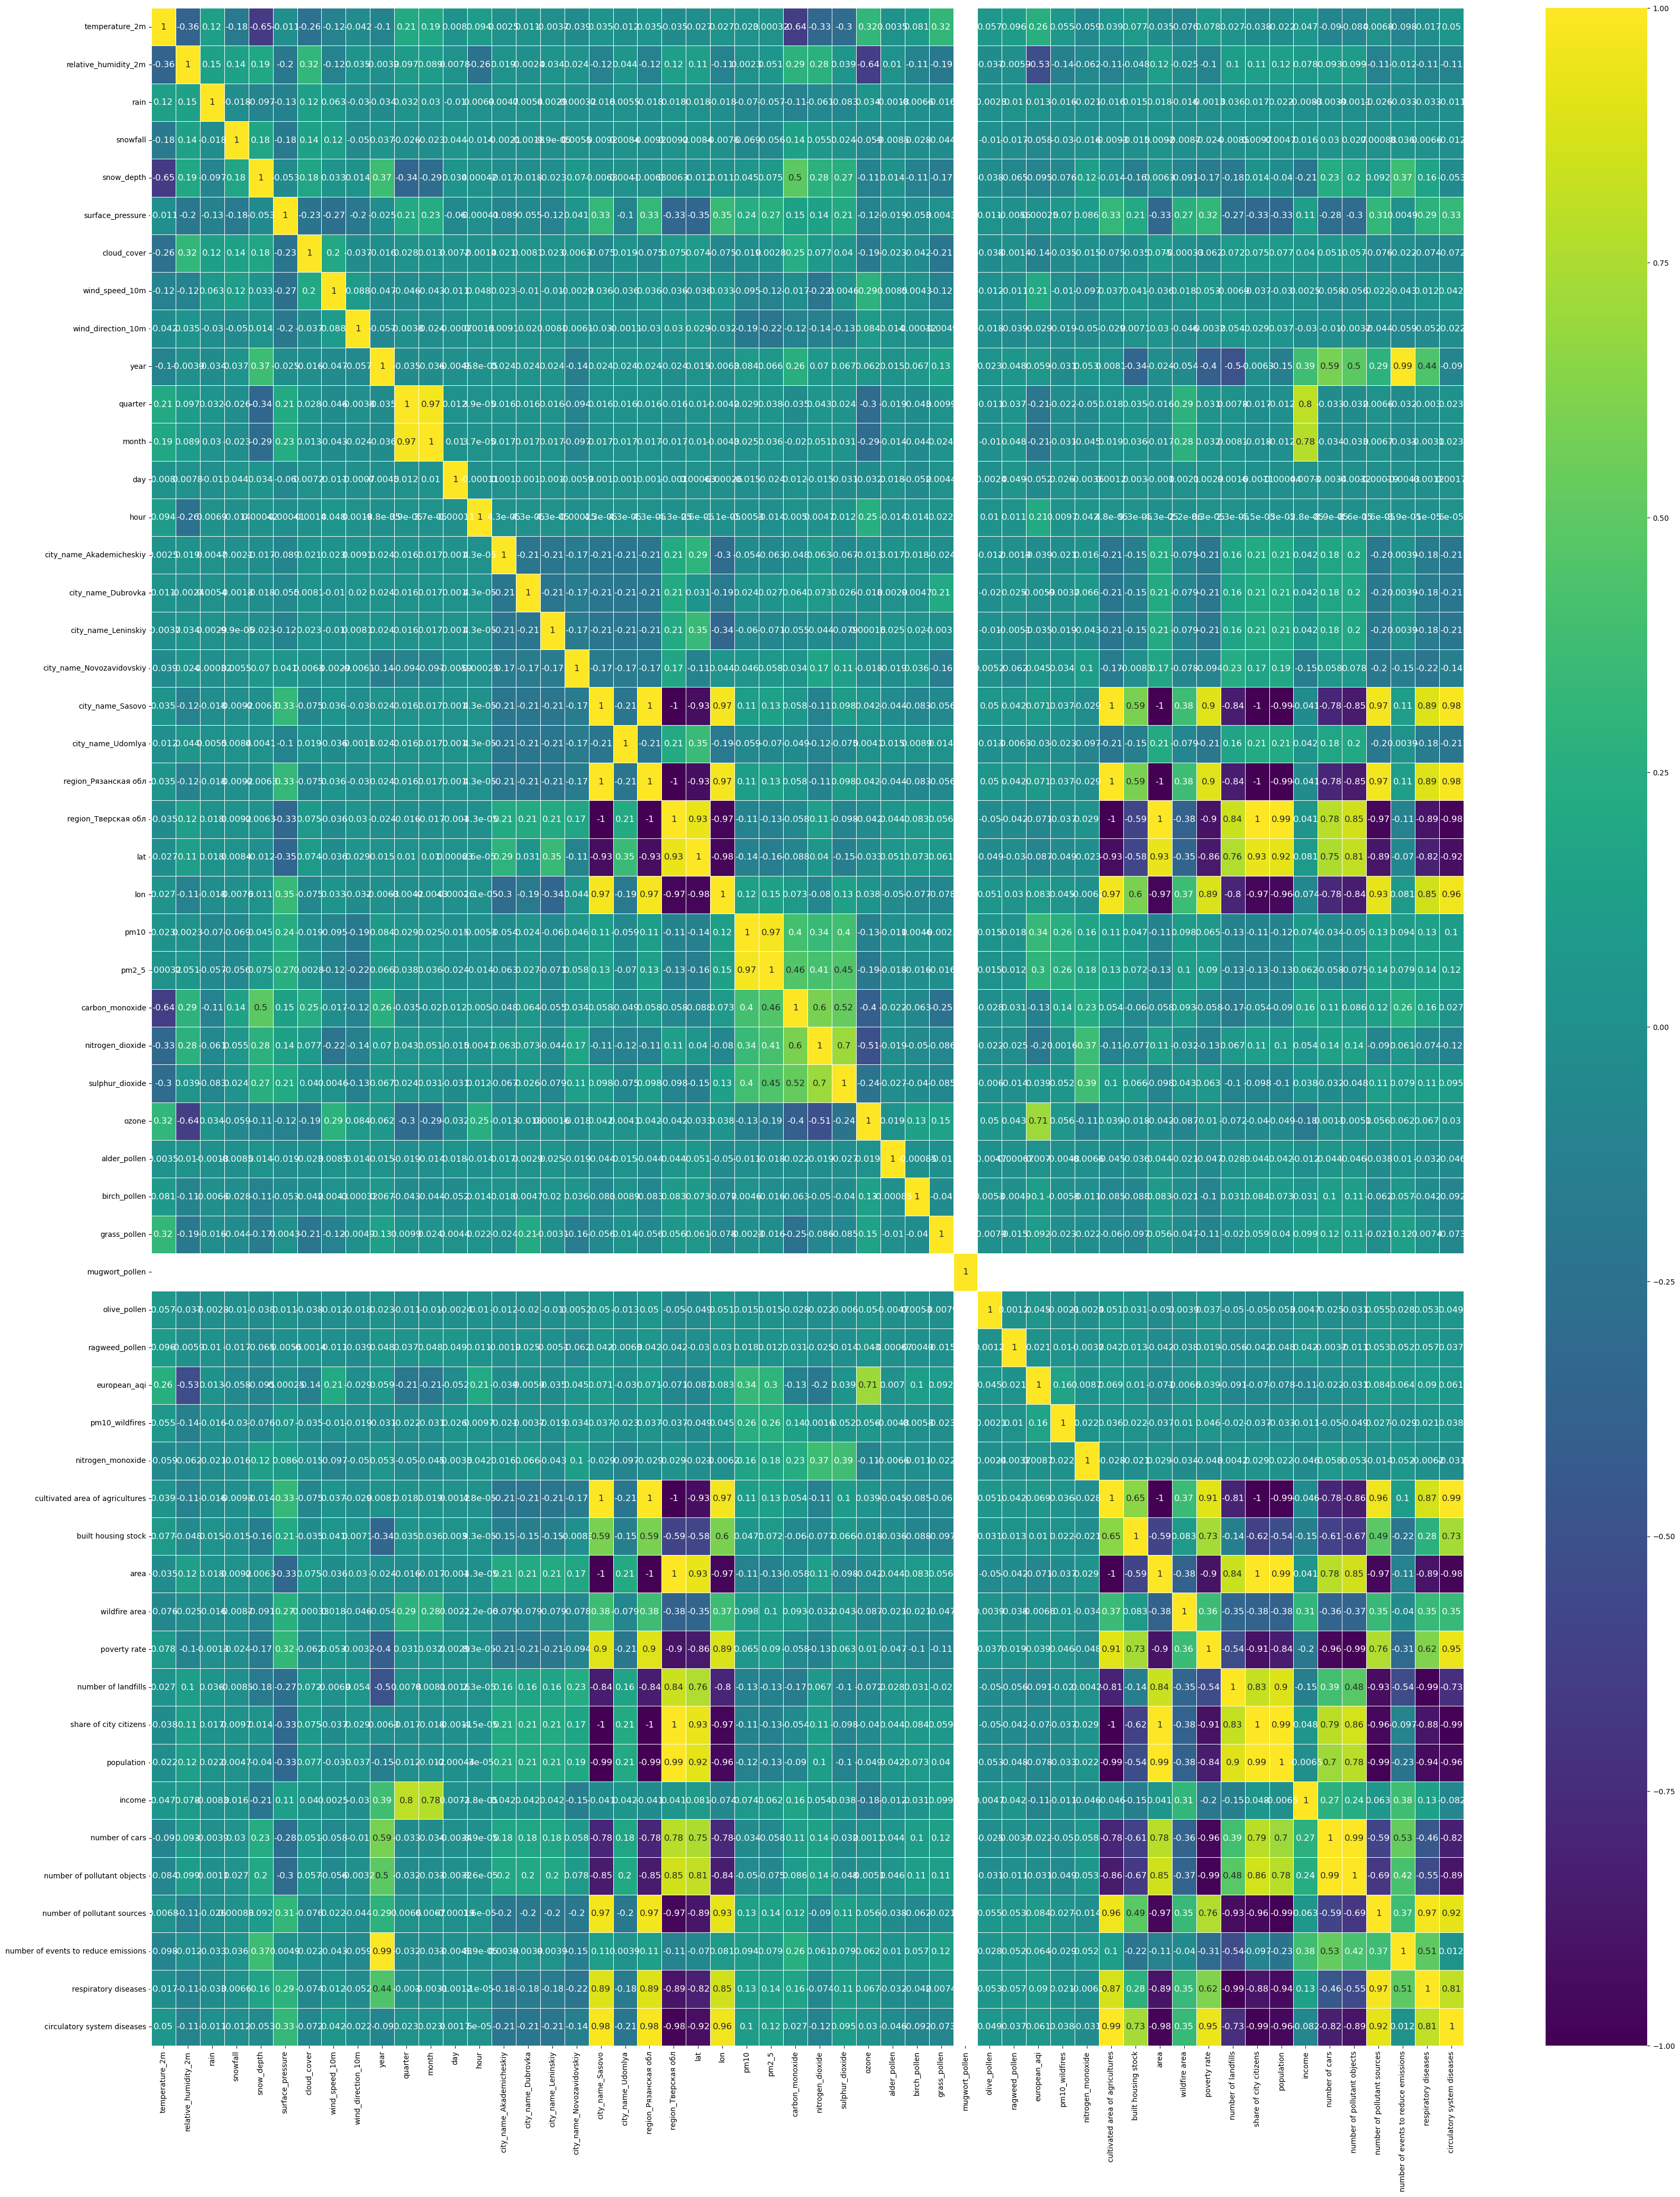

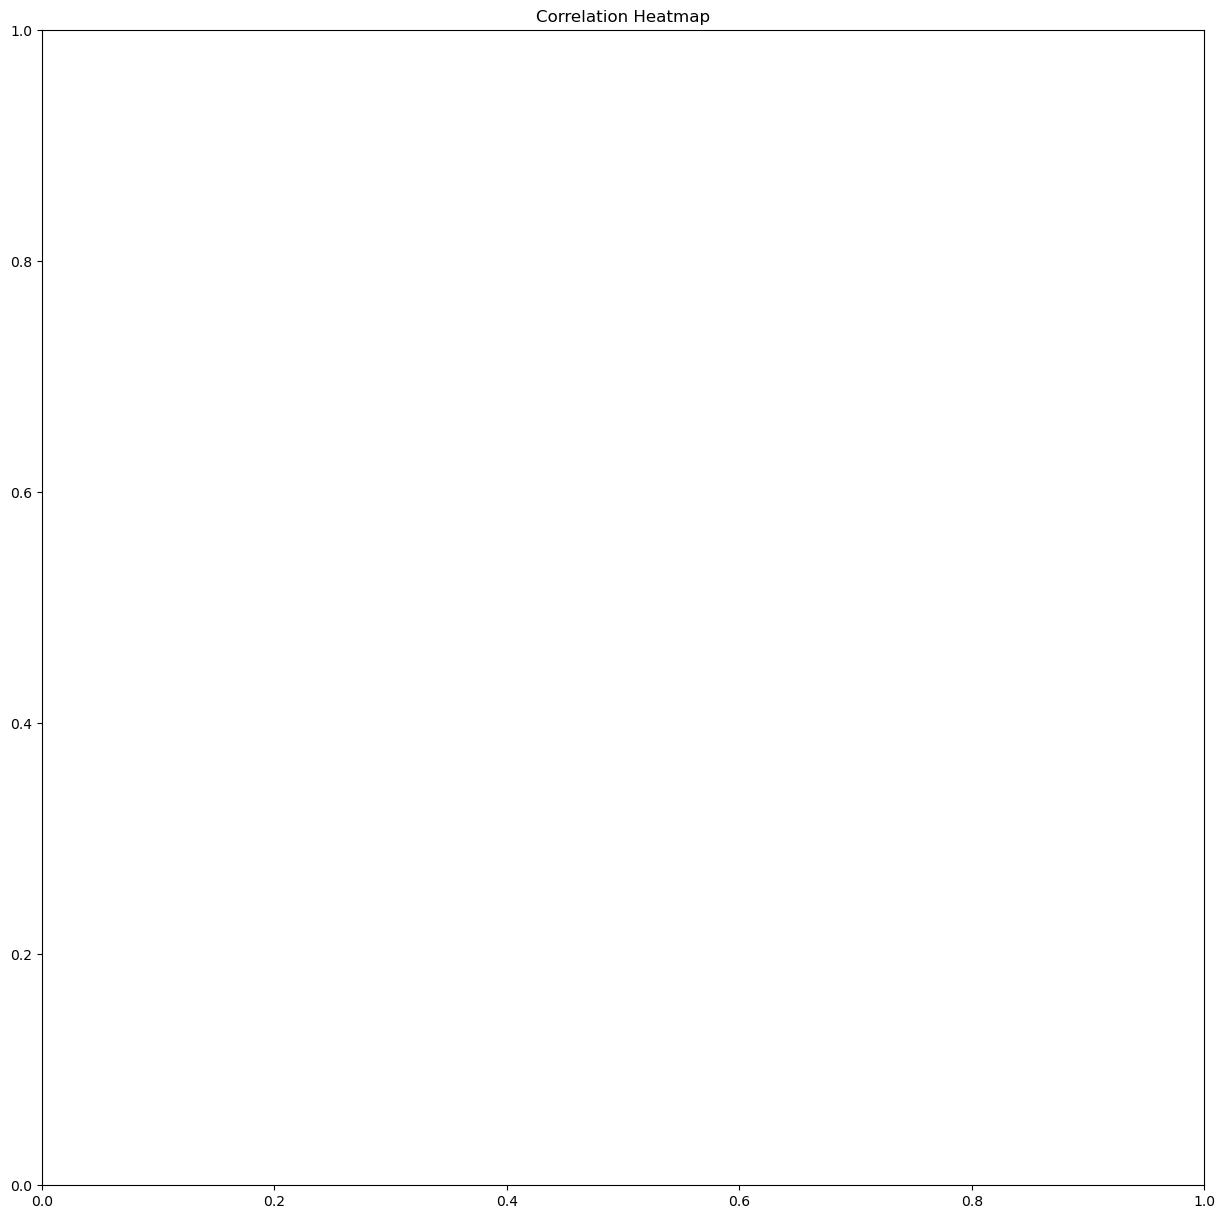

In [173]:

cov_matrix = numeric_df.corr()

correlation_matrix = cov_matrix.to_numpy().astype(float)
np.fill_diagonal(correlation_matrix, 1.0)


plt.figure(figsize=(40, 50))
sns.heatmap(correlation_matrix,
            xticklabels=numeric_df.columns,
            yticklabels=numeric_df.columns,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})
plt.figure(figsize=(15, 15))

plt.title('Correlation Heatmap')
plt.show()